**Лабораторная работа №4
Фильтрация и выделение контуров**

**Цель работы:** Освоение основных способов фильтрации изображений от шумов и выделения контуров.

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import scipy

**1. Типы шумов. Выбрать произвольное изображение. Получить искаженные различными шумами изображения с помощью функции imnoise() с отличными от значений по умолчанию параметрами.**

Так как работаем на питоне, вместо imnoise() будет использоваться функция skI.util.random_noise()

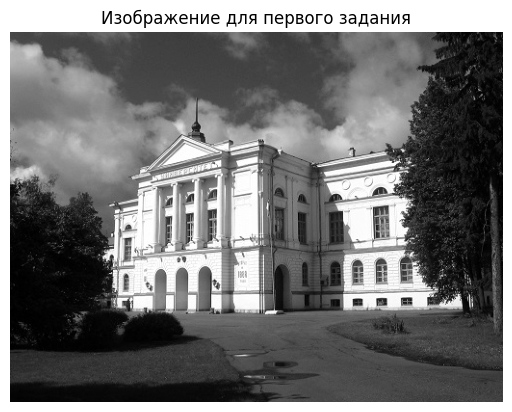

In [11]:
I = cv2.imread("tsu.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(I, cmap='gray')
plt.title('Изображение для первого задания')
plt.axis('off')
plt.show()

salt noise добавляет рандомные белые точки на изображение, pepper - чёрные. Добавляем с помощью библиотеки scikit 

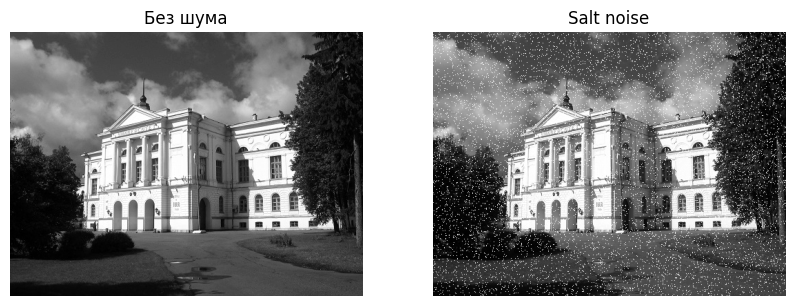

In [12]:
# наложение salt-шума
I_out_salt = skimage.util.random_noise(I, "salt")

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('Без шума')
plt.axis('off')
plt.imshow(I,  cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Salt noise')
plt.imshow(I_out_salt,  cmap='gray')
plt.axis('off')
plt.show()

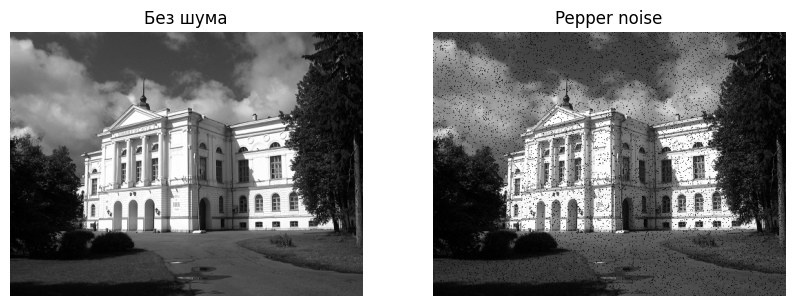

In [13]:
# наложение pepper-шума
I_out_pepper = skimage.util.random_noise(I, "pepper")

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('Без шума')
plt.axis('off')
plt.imshow(I,  cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Pepper noise')
plt.imshow(I_out_pepper,  cmap='gray')
plt.axis('off')
plt.show()

Третий шум - Гауссов (нормальный). На изображении может возникать в следствие недостатка освещенности сцены, высокой температуры и т.д. Модель шума широко распространена в задачах низкочастотной фильтрации изображений.

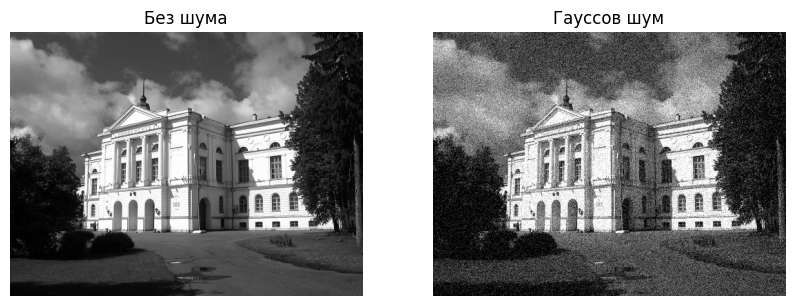

In [14]:
# гауссов шум
I_out_gauss = skimage.util.random_noise(I, "gaussian")

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('Без шума')
plt.axis('off')
plt.imshow(I,  cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Гауссов шум')
plt.imshow(I_out_gauss,  cmap='gray')
plt.axis('off')
plt.show()

**2. Низкочастотная фильтрация. Обработать полученные в предыдущем пункте искаженные изображения фильтром Гаусса и контргармоническим усредняющим фильтром с различными значениями параметра 𝑄.**

Низкочастотные пространственные фильтры ослабляют высокочастотные компоненты (области с сильным изменением интенсивностей) и оставляют низкочастотные компоненты изображения без изменений.

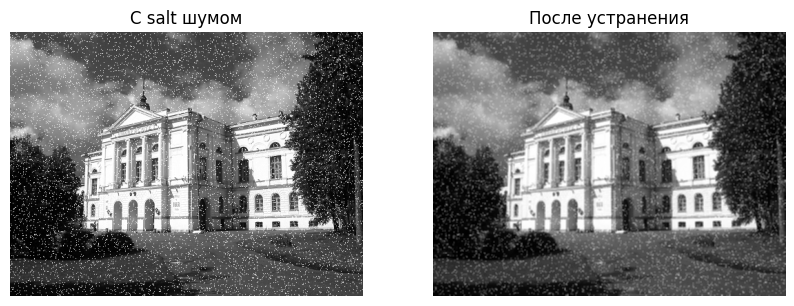

In [15]:
# применяем фильтр Гаусса на изображение с salt-шумом
I_out_salt_new = cv2.GaussianBlur(I_out_salt,(3,3),sigmaX=7, sigmaY=7)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('С salt шумом')
plt.axis('off')
plt.imshow(I_out_salt,  cmap='gray')

plt.subplot(1, 2, 2)
plt.title('После устранения')
plt.imshow(I_out_salt_new,  cmap='gray')
plt.axis('off')
plt.show()

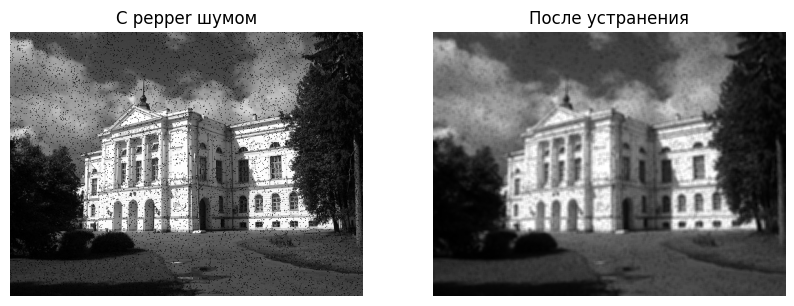

In [16]:
# применяем фильтр Гаусса на изображение с pepper-шумом
I_out_pepper_new = cv2.GaussianBlur(I_out_pepper,(5,5),sigmaX=5, sigmaY=5)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('С pepper шумом')
plt.axis('off')
plt.imshow(I_out_pepper,  cmap='gray')

plt.subplot(1, 2, 2)
plt.title('После устранения')
plt.imshow(I_out_pepper_new,  cmap='gray')
plt.axis('off')
plt.show()

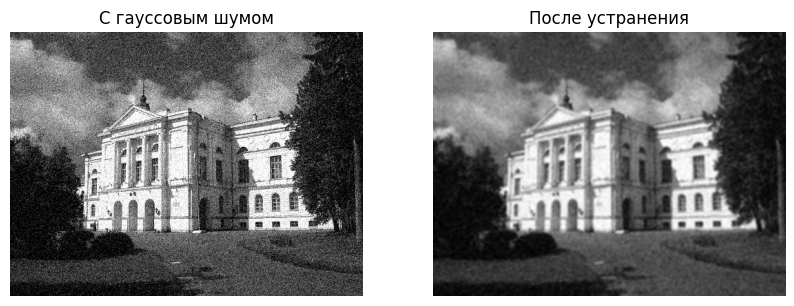

In [17]:
# фильтр Гаусса на изображении с гауссовским шумом
I_out_gauss_new = cv2.GaussianBlur(I_out_gauss,(5,5),2)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('С гауссовым шумом')
plt.axis('off')
plt.imshow(I_out_gauss,  cmap='gray')

plt.subplot(1, 2, 2)
plt.title('После устранения')
plt.imshow(I_out_gauss_new,  cmap='gray')
plt.axis('off')
plt.show()

Контргармонический фильтр является обобщением усредняющих фильтров и при 𝑄 > 0 подавляет шумы типа «перец», а при 𝑄 < 0 — шумы типа «соль», однако одновременное удаление белых и черных точек невозможно. При 𝑄 = 0 фильтр превращается в арифметический, а при 𝑄 = −1 — в гармонический.

In [18]:
# контргармонический усредняющий фильтр
def contraharmonic_mean(img, size, Q):
    num = np.power(img, Q + 1)
    denom = np.power(img, Q)
    kernel = np.full(size, 1.0)
    result = cv2.filter2D(num, -1, kernel) / cv2.filter2D(denom, -1, kernel)
    return result

C:\Users\Asus\AppData\Local\Temp\ipykernel_10696\3222709863.py:4: RuntimeWarning: divide by zero encountered in power
  denom = np.power(img, Q)


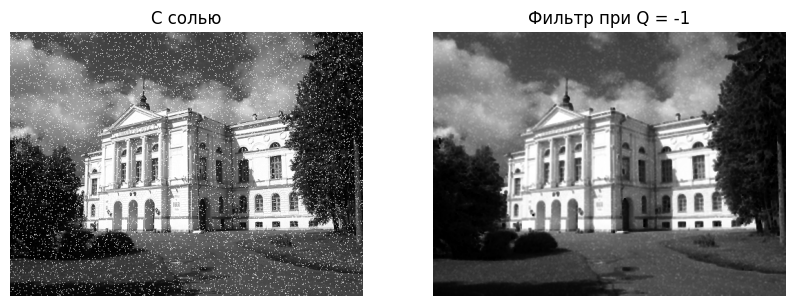

In [19]:
I_out_salt_filter = contraharmonic_mean(I_out_salt, (3,3), -1)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('С солью')
plt.axis('off')
plt.imshow(I_out_salt,  cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Фильтр при Q = -1')
plt.imshow(I_out_salt_filter,  cmap='gray')
plt.axis('off')
plt.show()

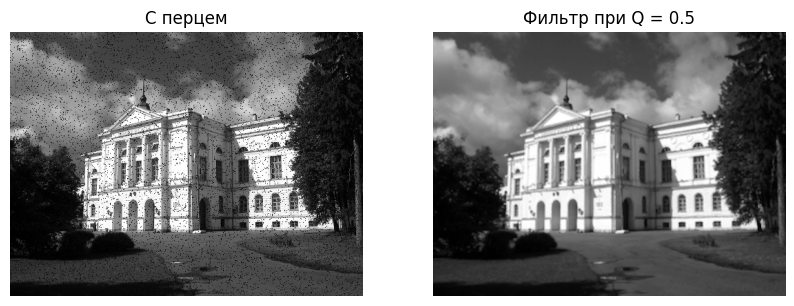

In [20]:
I_out_pepper_filter = contraharmonic_mean(I_out_pepper, (3,3), 0.5)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('С перцем')
plt.axis('off')
plt.imshow(I_out_pepper,  cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Фильтр при Q = 0.5')
plt.imshow(I_out_pepper_filter,  cmap='gray')
plt.axis('off')
plt.show()

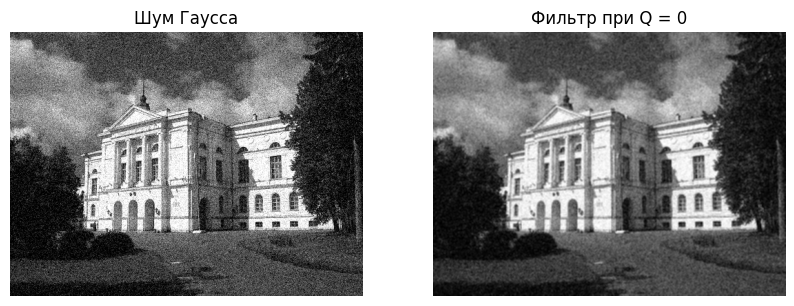

In [21]:
I_out_gauss_filter = contraharmonic_mean(I_out_gauss, (3,3), 0)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('Шум Гаусса')
plt.axis('off')
plt.imshow(I_out_gauss,  cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Фильтр при Q = 0')
plt.imshow(I_out_gauss_filter,  cmap='gray')
plt.axis('off')
plt.show()

На изображениях выже контргармонический фильтр выдал неплохой результат. Попробуем задать значение Q не по "правилам" - для изображения с шумом pepper используем отрицательное Q:

C:\Users\Asus\AppData\Local\Temp\ipykernel_10696\3222709863.py:4: RuntimeWarning: divide by zero encountered in power
  denom = np.power(img, Q)


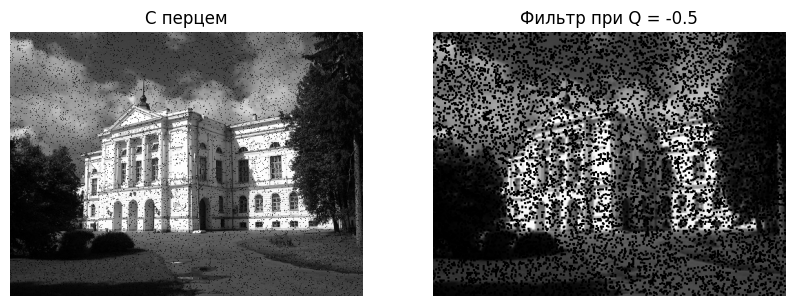

In [22]:
I_out_pepper_filter_bad = contraharmonic_mean(I_out_pepper, (3,3), -0.5)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title('С перцем')
plt.axis('off')
plt.imshow(I_out_pepper,  cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Фильтр при Q = -0.5')
plt.imshow(I_out_pepper_filter_bad,  cmap='gray')
plt.axis('off')
plt.show()

Как и ожидалось, при неправильно подобранном Q фильтр ухудшил изображение.

**3. Нелинейная фильтрация. Обработать полученные в первом пункте искаженные изображения медианной, взвешенной медианной, ранговой и винеровской фильтрациями при различных размерах маски и ее коэффициентов. Реализовать адаптивную медианную фильтрацию.**

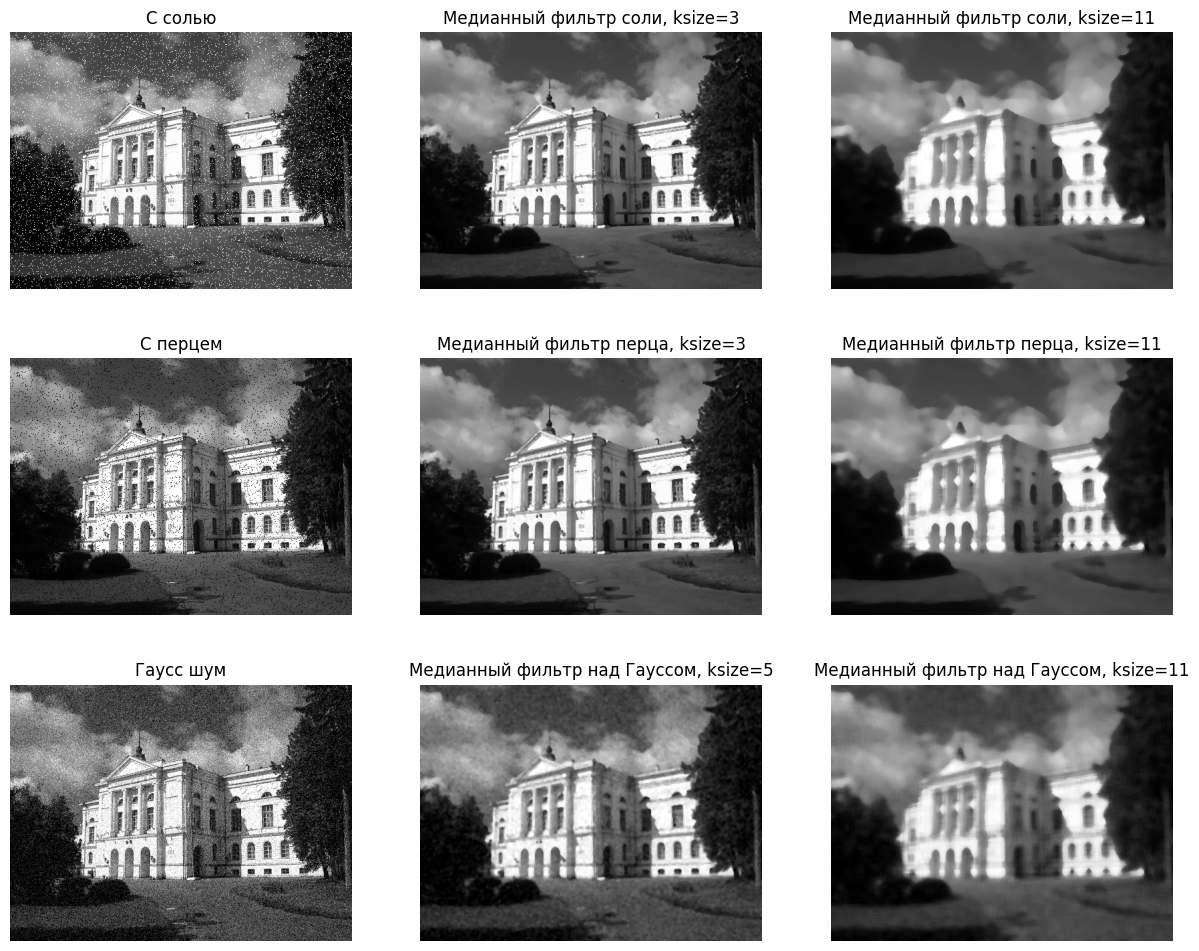

In [23]:
# обработка медианной фильтрацией

plt.figure(figsize=(15,12))
plt.subplot(3, 3, 1)
plt.title('С солью')
plt.axis('off')
plt.imshow(I_out_salt,  cmap='gray')

plt.subplot(3, 3, 2)
plt.title('Медианный фильтр соли, ksize=3')
plt.imshow(cv2.medianBlur((I_out_salt*255).astype(np.uint8), 3),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('Медианный фильтр соли, ksize=11')
plt.imshow(cv2.medianBlur((I_out_salt*255).astype(np.uint8), 11),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title('С перцем')
plt.axis('off')
plt.imshow(I_out_pepper,  cmap='gray')

plt.subplot(3, 3, 5)
plt.title('Медианный фильтр перца, ksize=3')
plt.imshow(cv2.medianBlur((I_out_pepper*255).astype(np.uint8), 3),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title('Медианный фильтр перца, ksize=11')
plt.imshow(cv2.medianBlur((I_out_pepper*255).astype(np.uint8), 11),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title('Гаусс шум')
plt.axis('off')
plt.imshow(I_out_gauss,  cmap='gray')

plt.subplot(3, 3, 8)
plt.title('Медианный фильтр над Гауссом, ksize=5')
plt.imshow(cv2.medianBlur((I_out_gauss*255).astype(np.uint8), 5),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.title('Медианный фильтр над Гауссом, ksize=11')
plt.imshow(cv2.medianBlur((I_out_gauss*255).astype(np.uint8), 11),  cmap='gray')
plt.axis('off')

plt.show()

In [24]:
# функция для взвешенного медианного фильтра

def averMedianFilter(I,k_size_user):
    # Filter parameter
    k_size = k_size_user
    rank = 4
    kernel = np. ones (k_size , dtype = np. float32 )
    rows , cols = I. shape [0:2]
    # Convert to float
    # and make I with border
    if I. dtype == np. uint8 :
        I_copy = I. astype (np. float32 ) / 255
    else :
        I_copy = I
    I_copy = cv2.copyMakeBorder (I_copy ,
        int (( k_size [0] - 1) / 2),
        int ( k_size [0] / 2),
        int (( k_size [1] - 1) / 2),
        int ( k_size [1] / 2), cv2. BORDER_REPLICATE )
    # Fill arrays for each kernel item
    I_layers = np. zeros (I. shape +
        ( k_size [0] * k_size [1] , ),
        dtype = np. float32 )
    if I. ndim == 2:
        for i in range ( k_size [0]):
            for j in range ( k_size [1]):
                I_layers [:, :, i * k_size [1] + j] = kernel [i, j] * \
                    I_copy [i:i + rows , j:j + cols ]
    else :
        for i in range ( k_size [0]):
            for j in range ( k_size [1]):
                I_layers [:, :, :, i * k_size [1] + j] = kernel [i, j] * \
                I_copy [i:i + rows , j:j + cols , :]
    # Sort arrays
    I_layers . sort ()
    # Choose layer with rank
    if I. ndim == 2:
        I_out = I_layers [:, :, rank ]
    else :
        I_out = I_layers [:, :, :, rank ]
    # Convert back to uint if needed
    if (I. dtype == np. uint8 ):
        I_out = (255 * I_out ). clip (0, 255).astype (np. uint8 )
    return I_out

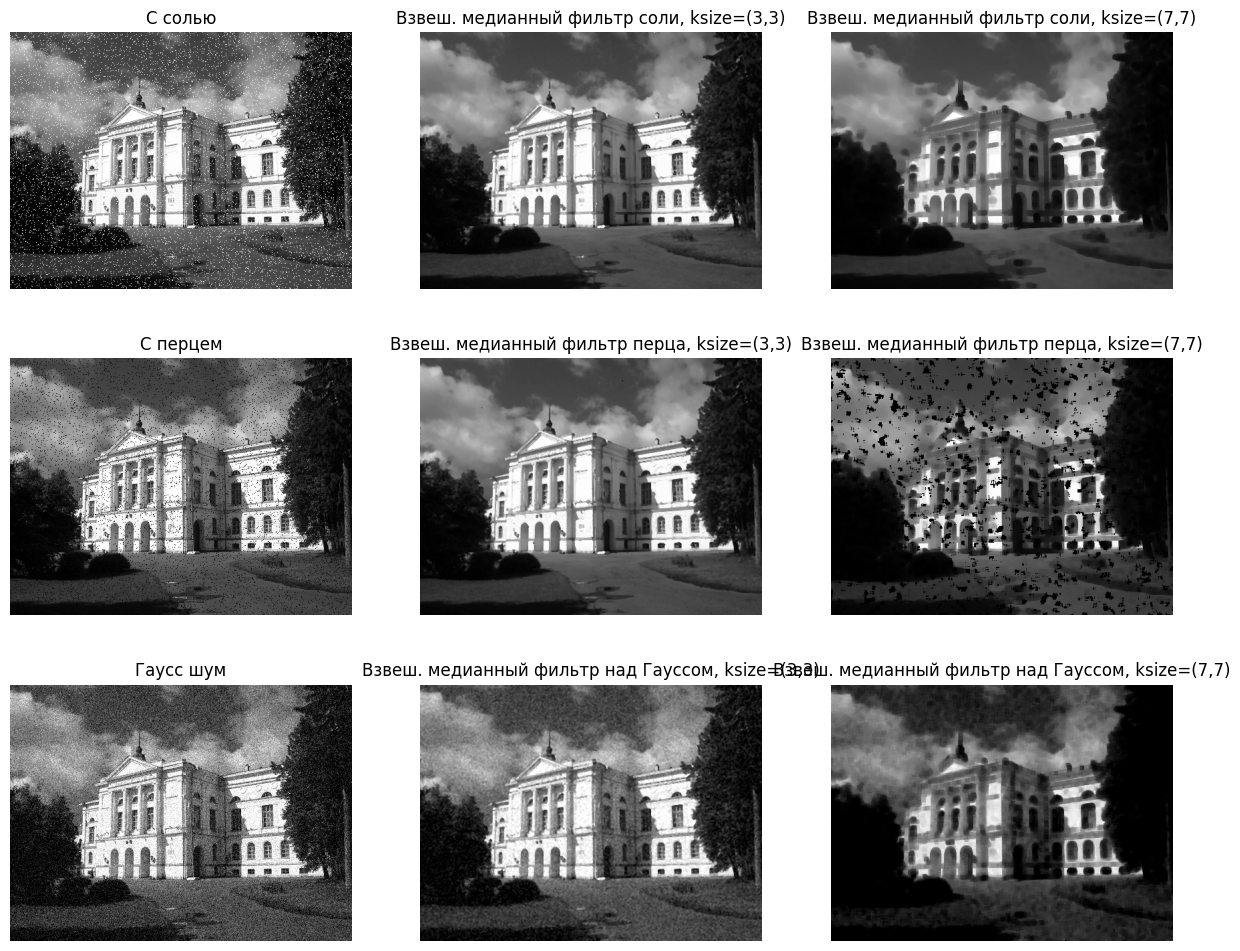

In [25]:
# обработка взвешенной медианной фильтрацией

plt.figure(figsize=(15,12))
plt.subplot(3, 3, 1)
plt.title('С солью')
plt.axis('off')
plt.imshow(I_out_salt,  cmap='gray')

plt.subplot(3, 3, 2)
plt.title('Взвеш. медианный фильтр соли, ksize=(3,3)')
plt.imshow(averMedianFilter(I_out_salt,(3,3)),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('Взвеш. медианный фильтр соли, ksize=(7,7)')
plt.imshow(averMedianFilter(I_out_salt,(7,7)),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title('С перцем')
plt.axis('off')
plt.imshow(I_out_pepper,  cmap='gray')

plt.subplot(3, 3, 5)
plt.title('Взвеш. медианный фильтр перца, ksize=(3,3)')
plt.imshow(averMedianFilter(I_out_pepper,(3,3)),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title('Взвеш. медианный фильтр перца, ksize=(7,7)')
plt.imshow(averMedianFilter(I_out_pepper,(7,7)),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title('Гаусс шум')
plt.axis('off')
plt.imshow(I_out_gauss,  cmap='gray')

plt.subplot(3, 3, 8)
plt.title('Взвеш. медианный фильтр над Гауссом, ksize=(3,3)')
plt.imshow(averMedianFilter(I_out_gauss,(3,3)),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.title('Взвеш. медианный фильтр над Гауссом, ksize=(7,7)')
plt.imshow(averMedianFilter(I_out_gauss,(7,7)),  cmap='gray')
plt.axis('off')

plt.show()

In [26]:
# Винеровская фильтрация
# Define parameters
def wienerFilter(I, k_size_user):
    rows, cols = I.shape[0], I.shape[1]
    k_size = k_size_user
    kernel = np. ones (( k_size [0] , k_size [1]))
    # Convert to float
    # and make I with border
    if I. dtype == np. uint8 :
        img_copy = I. astype (np. float32 ) / 255
    else :
        img_copy = I
    img_copy = cv2.copyMakeBorder ( img_copy ,
            int (( k_size [0] - 1) / 2),
            int ( k_size [0] / 2),
            int (( k_size [1] - 1) / 2),
            int ( k_size [1] / 2),
            cv2. BORDER_REPLICATE )
    # Split into layers
    bgr_planes = cv2. split ( img_copy )
    bgr_planes_2 = []
    k_power = np. power (kernel , 2)
    # For all layers
    for plane in bgr_planes :
        # Calculate temporary matrices for I ** 2
        plane_power = np. power (plane , 2)
        m = np. zeros (I. shape [0:2] , np. float32 )
        q = np. zeros (I. shape [0:2] , np. float32 )
        # Calculate variance values
        for i in range ( k_size [0]):
            for j in range ( k_size [1]):
                m = m + kernel [i, j] * plane [i:i + rows , j:j + cols ]
                q = q + k_power [i, j] * plane_power [i:i + rows , j:j + cols ]
        m = m / np.sum( kernel )
        q = q / np.sum( kernel )
        q = q - m * m
        # Calculate noise as an average variance
        v = np.sum(q) / I. size
        # Do filter
        plane_2 = plane [( k_size [0] - 1) // 2: \
                ( k_size [0] - 1) // 2 + rows , \
                ( k_size [1] - 1) // 2: \
                ( k_size [1] - 1) // 2 + cols ]
        plane_2 = np. where (q < v, m,
            ( plane_2 - m) * (1 - v / q) + m)
        bgr_planes_2 . append ( plane_2 )
    # Merge I back
    I_out = cv2. merge ( bgr_planes_2 )
    # Convert back to uint if needed
    if (I. dtype == np. uint8 ):
        I_out = (255 * I_out ). clip (0, 255).astype (np. uint8 )
    return I_out

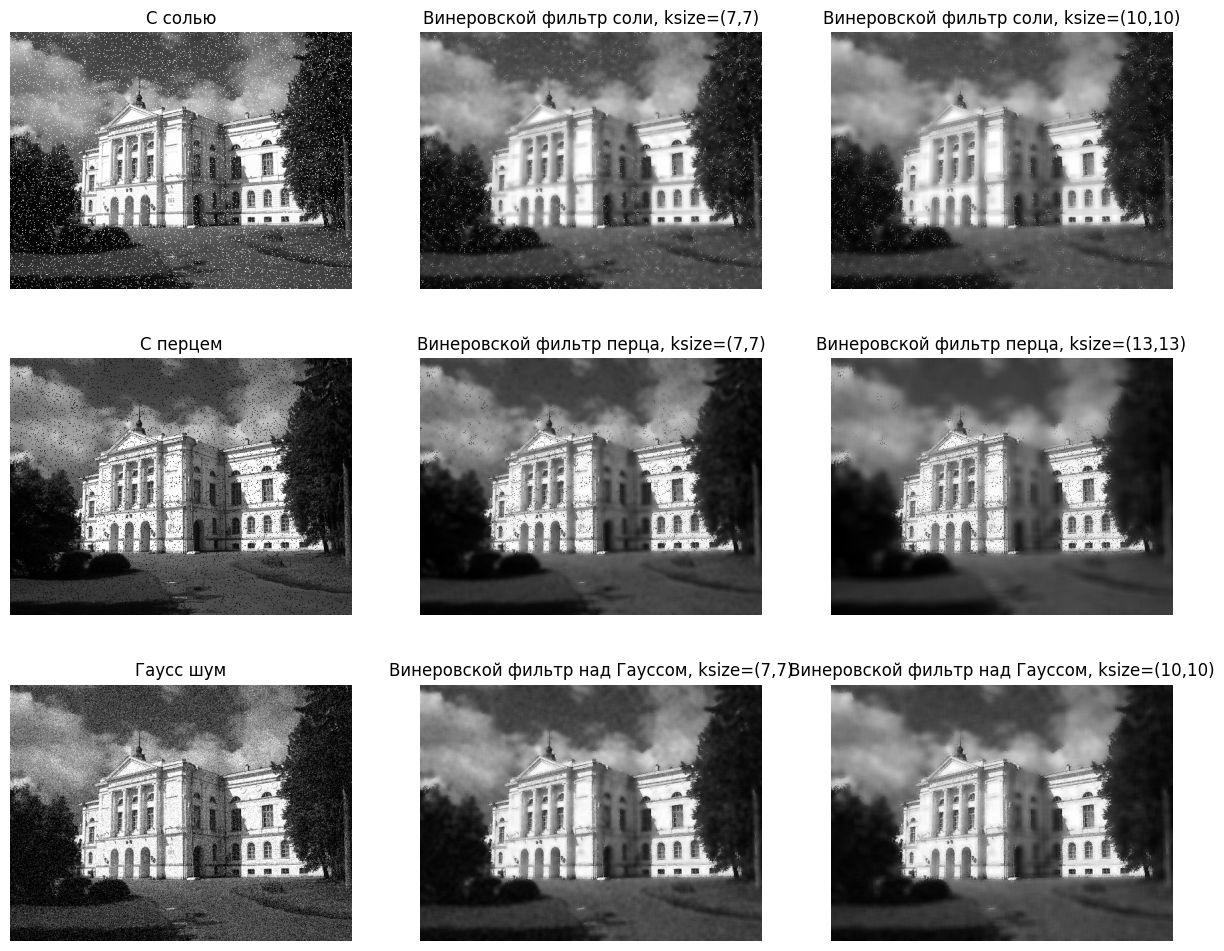

In [27]:
# обработка Винеровской фильтрацией

plt.figure(figsize=(15,12))
plt.subplot(3, 3, 1)
plt.title('С солью')
plt.axis('off')
plt.imshow(I_out_salt,  cmap='gray')

plt.subplot(3, 3, 2)
plt.title('Винеровской фильтр соли, ksize=(7,7)')
plt.imshow(wienerFilter(I_out_salt,(7,7)),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('Винеровской фильтр соли, ksize=(10,10)')
plt.imshow(wienerFilter(I_out_salt,(10,10)),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title('С перцем')
plt.axis('off')
plt.imshow(I_out_pepper,  cmap='gray')

plt.subplot(3, 3, 5)
plt.title('Винеровской фильтр перца, ksize=(7,7)')
plt.imshow(wienerFilter(I_out_pepper,(7,7)),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title('Винеровской фильтр перца, ksize=(13,13)')
plt.imshow(wienerFilter(I_out_pepper,(13,13)),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title('Гаусс шум')
plt.axis('off')
plt.imshow(I_out_gauss,  cmap='gray')

plt.subplot(3, 3, 8)
plt.title('Винеровской фильтр над Гауссом, ksize=(7,7)')
plt.imshow(wienerFilter(I_out_gauss,(7,7)),  cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.title('Винеровской фильтр над Гауссом, ksize=(10,10)')
plt.imshow(wienerFilter(I_out_gauss,(10,10)),  cmap='gray')
plt.axis('off')

plt.show()

Обозначим через 𝑧𝑚𝑖𝑛, 𝑧𝑚𝑎𝑥, 𝑧𝑚𝑒𝑑 минимальное, максимальное и медианное значения интенсивностей в окне, 𝑧(𝑖,𝑗) — значение интенсивности пикселя с координатами (𝑖,𝑗), 𝑠𝑚𝑎𝑥 — максимально допустимый размер окна. 

Алгоритм адаптивной медианной фильтрации состоит из следующих шагов: 
1. Вычисление значений 𝑧𝑚𝑖𝑛, 𝑧𝑚𝑎𝑥, 𝑧𝑚𝑒𝑑, 𝐴1 = 𝑧𝑚𝑒𝑑−𝑧𝑚𝑖𝑛, 𝐴2 = 𝑧𝑚𝑒𝑑 − 𝑧𝑚𝑎𝑥 пикселя (𝑖,𝑗) в заданном окне. (a) Если 𝐴1 > 0 и 𝐴2 < 0, перейти на шаг 2. В противном случае увеличить размер окна. (b) Если текущий размер окна 𝑠 <=𝑠𝑚𝑎𝑥, повторить шаг 1. В противном случае результат фильтрации равен 𝑧(𝑖,𝑗) . 

2. Вычисление значений 𝐵1 = 𝑧(𝑖,𝑗) − 𝑧𝑚𝑖𝑛, 𝐵2 = 𝑧(𝑖,𝑗) − 𝑧𝑚𝑎𝑥. (a) Если 𝐵1 > 0 и 𝐵2 < 0, результат фильтрации равен 𝑧(𝑖,𝑗) . В противном случае результат фильтрации равен 𝑧𝑚𝑒𝑑. 

3. Изменение координат (𝑖,𝑗). (a) Если не достигнут предел изображения, перейти на шаг 1. В противном случае фильтрация окончена. Основной идеей является увеличение размера окна до тех пор, пока алгоритм не найдет медианное значение, не являющееся импульсным шумом, или пока не достигнет максимального размера окна. В последнем случае алгоритм вернет величину 𝑧(𝑖,𝑗)

In [28]:
def adaptiveMedianFilter(I, smax):
    filtered_I = I.copy()
    width, height = I.shape

    for i in range(width):
        for j in range(height):
            size = 1
            while size <= smax:
                half_size = size // 2
                
                # Определение границ окна
                xmin = max(i - half_size, 0)
                xmax = min(i + half_size + 1, width)
                ymin = max(j - half_size, 0)
                ymax = min(j + half_size + 1, height)

                # Извлечение окна
                window = I[xmin:xmax, ymin:ymax]
                zmin = np.min(window)
                zmax = np.max(window)
                zmed = np.median(window)

                # Рассчитываем A1 и A2
                A1 = zmed - zmin
                A2 = zmed - zmax

                if A1 > 0 and A2 < 0:
                    B1 = I[i, j] - zmin
                    B2 = I[i, j] - zmax

                    if B1 > 0 and B2 < 0:  
                        # Используем текущее значение пикселя
                        filtered_I[i, j] = I[i, j]
                    else:
                        # Используем медианное значение
                        filtered_I[i, j] = zmed
                    break  # Переходим к следующему пикселю
                else:
                    # Увеличиваем размер окна
                    size += 2
                
                if size > smax:
                    # Если достигнут максимальный размер окна, используем текущее значение пикселя
                    filtered_I[i, j] = I[i, j]
                    break  # Переходим к следующему пикселю

    return filtered_I

In [29]:
adaptiveMedianSalt = adaptiveMedianFilter(I_out_salt, 30)

In [30]:
adaptiveMedianPepper = adaptiveMedianFilter(I_out_pepper,30)

In [31]:
adaptiveMedianGauss = adaptiveMedianFilter(I_out_gauss, 30)

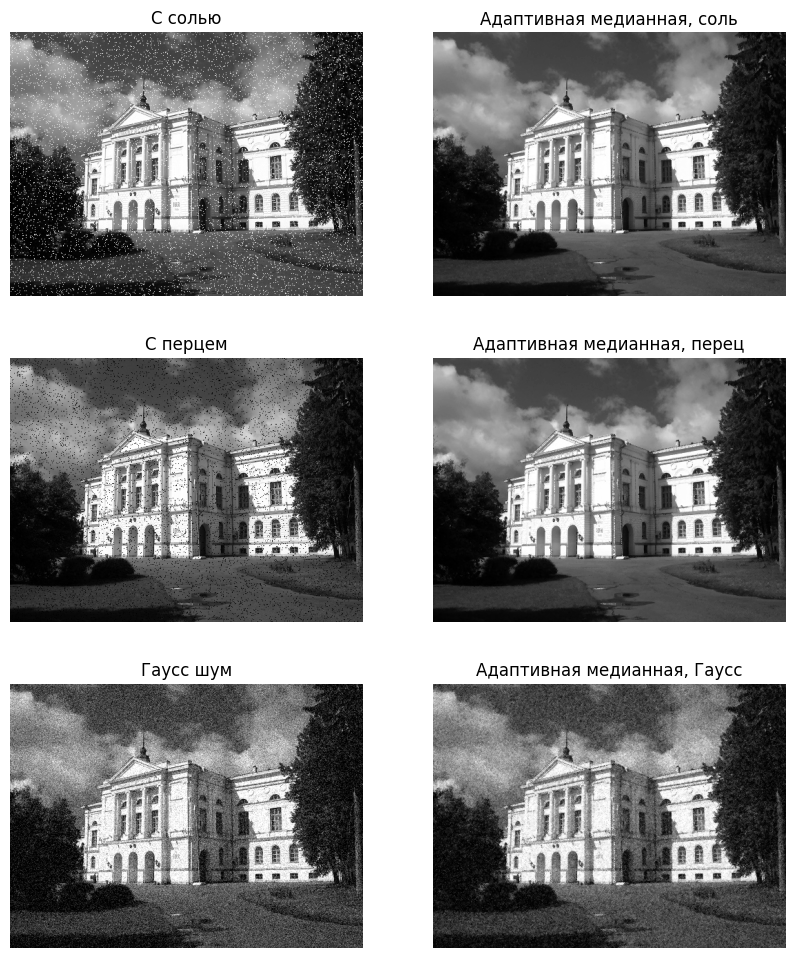

In [32]:
# обработка адаптивной медианной фильтрацией

plt.figure(figsize=(10,12))
plt.subplot(3, 2, 1)
plt.title('С солью')
plt.axis('off')
plt.imshow(I_out_salt,  cmap='gray')

plt.subplot(3, 2, 2)
plt.title('Адаптивная медианная, соль')
plt.imshow(adaptiveMedianSalt,  cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('С перцем')
plt.axis('off')
plt.imshow(I_out_pepper,  cmap='gray')

plt.subplot(3, 2, 4)
plt.title('Адаптивная медианная, перец')
plt.imshow(adaptiveMedianPepper,  cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('Гаусс шум')
plt.axis('off')
plt.imshow(I_out_gauss,  cmap='gray')

plt.subplot(3, 2, 6)
plt.title('Адаптивная медианная, Гаусс')
plt.imshow(adaptiveMedianGauss,  cmap='gray')
plt.axis('off')

plt.show()

**4. Высокочастотная фильтрация. Выбрать исходное изображение. Выделить границы фильтрами Робертса, Превитта, Собела, Лапласа, алгоритмом Кэнни.**

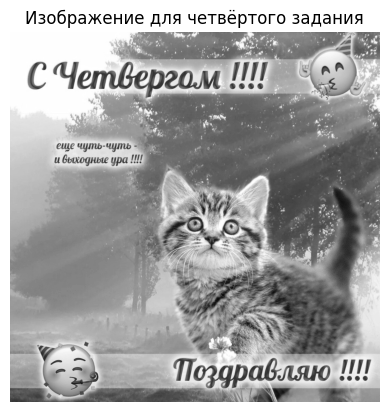

In [33]:
I4 = cv2.imread("catmeme.jpg")
I4 = cv2.cvtColor(np.float32(I4), cv2.COLOR_BGR2GRAY)
plt.imshow(I4,  cmap='gray')
plt.title('Изображение для четвёртого задания')
plt.axis('off')
plt.show()

In [34]:
# фильтр Робертса
#I4gray = cv2.cvtColor(np.float32(I4), cv2.COLOR_BGR2GRAY)
G_x = np.array([[1, -1], [0, 0]])
G_y = np.array([[1, 0], [-1, 0]])
I_x = cv2.filter2D(I4, -1, G_x)
I_y = cv2.filter2D(I4, -1, G_y)
I_out_Roberts = cv2.magnitude(I_x, I_y)

In [35]:
# фильтр Превитта
I_out_Prewitt = scipy.ndimage.prewitt(I4)

In [36]:
# фильтр Собела
I_out_Sobel = cv2.Sobel(I4, 2, 1, 1, ksize=3)

In [37]:
# фильтр Лапласа
I_out_Laplace = scipy.ndimage.laplace(I4)

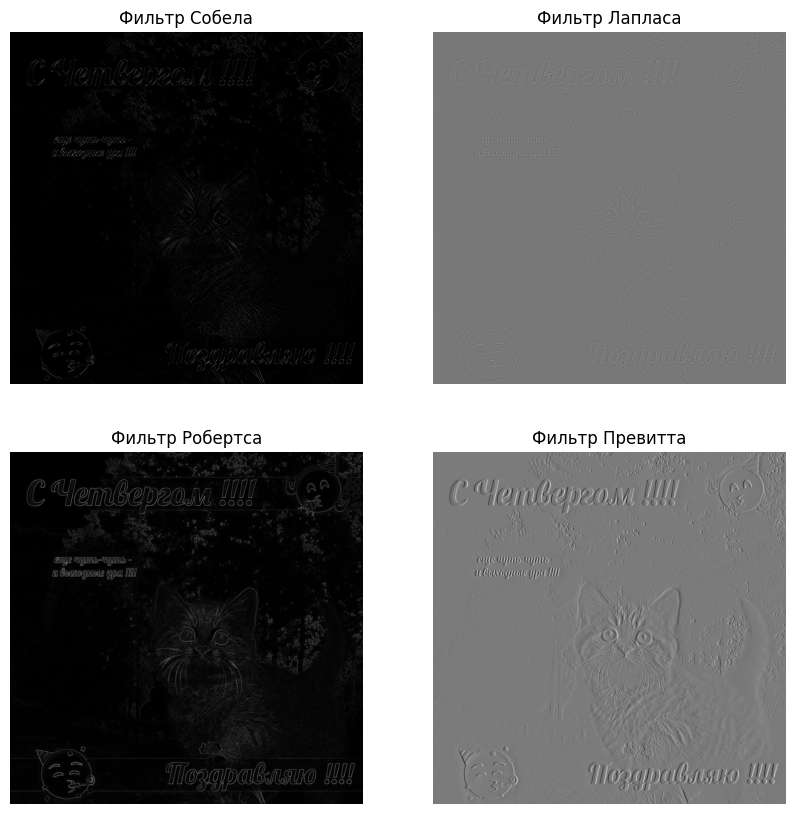

In [38]:
# выводим все изображения

plt.figure(figsize=(10,20))
plt.subplot(1, 2, 1)
plt.title('Фильтр Робертса')
plt.axis('off')
plt.imshow(I_out_Roberts, cmap="gray")

plt.subplot(1, 2, 2)
plt.title('Фильтр Превитта')
plt.imshow(I_out_Prewitt, cmap="gray")
plt.axis('off')

plt.subplot(2, 2, 1)
plt.title('Фильтр Собела')
plt.axis('off')
plt.imshow(I_out_Sobel,  cmap="gray")

plt.subplot(2, 2, 2)
plt.title('Фильтр Лапласа')
plt.imshow(I_out_Laplace, cmap="gray")
plt.axis('off')

plt.show()

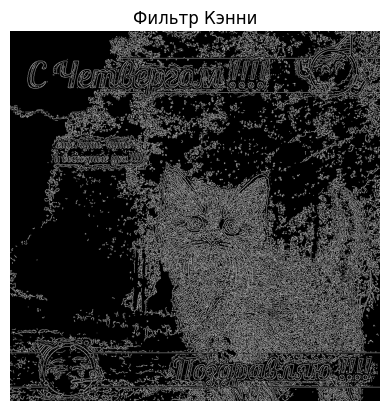

In [39]:
# фильтр Кэнни
I_out_Canny = cv2.Canny(cv2.imread("catmeme.jpg"), 30, 40)

plt.imshow(I_out_Canny, cmap="gray")
plt.title('Фильтр Кэнни')
plt.axis('off')
plt.show()